In [199]:
import re
import subprocess
import time
import matplotlib.pyplot as plt
import os

In [200]:
def run_stress_ng(method, worker_num):
    command = f"stress-ng --{method} {worker_num} --timeout 140s --metrics"
    print(command)
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, preexec_fn=os.setsid)
    return process

In [201]:
def run_iostat(duration, interval):
    tps_values = []
    kb_read_values = []
    kb_wrtn_values = []

    iostat_command = f"iostat -t -k {interval} {duration}"
    process = subprocess.Popen(iostat_command, shell=True, stdout=subprocess.PIPE, text=True)

    for line in process.stdout:
        if line.startswith('sda'):
            parts = line.split()
            print(parts)
            tps = float(parts[1].replace(',', '.'))
            kb_read = float(parts[2].replace(',', '.'))
            kb_wrtn = float(parts[3].replace(',', '.'))

            tps_values.append(tps)
            kb_read_values.append(kb_read)
            kb_wrtn_values.append(kb_wrtn)

    return tps_values, kb_read_values, kb_wrtn_values

In [202]:
def plot_graphs(tps_values, kb_read_values, kb_wrtn_values, workers_num, method):
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(tps_values, label='tps')
    plt.title(f'Number of workers: {workers_num}\n{method}\nTransactions per Second (tps)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('tps')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(kb_read_values, label='kB_read/s')
    plt.plot(kb_wrtn_values, label='kB_wrtn/s')
    plt.title(f'kB_read/s and kB_wrtn/s')
    plt.xlabel('Time (seconds)')
    plt.ylabel('kB/s')
    plt.legend()

    plt.tight_layout()
    plt.show()

stress-ng --iomix 10 --timeout 140s --metrics
['sda', '800,68', '1205,19', '5074,96', '0,00', '14952989', '62965901', '0']
['sda', '3663,00', '1844,00', '35724,00', '0,00', '1844', '35724', '0']
['sda', '3734,00', '1568,00', '37796,00', '0,00', '1568', '37796', '0']
['sda', '3598,00', '2068,00', '35912,00', '0,00', '2068', '35912', '0']
['sda', '3911,00', '2348,00', '37264,00', '0,00', '2348', '37264', '0']
['sda', '4025,00', '3128,00', '37584,00', '0,00', '3128', '37584', '0']
['sda', '3681,00', '2652,00', '36728,00', '0,00', '2652', '36728', '0']
['sda', '3806,00', '2616,00', '36996,00', '0,00', '2616', '36996', '0']
['sda', '3978,00', '2152,00', '38916,00', '0,00', '2152', '38916', '0']
['sda', '3919,00', '2892,00', '36940,00', '0,00', '2892', '36940', '0']
['sda', '3608,00', '2672,00', '35424,00', '0,00', '2672', '35424', '0']
['sda', '3801,00', '2920,00', '35748,00', '0,00', '2920', '35748', '0']
['sda', '3943,00', '3216,00', '37036,00', '0,00', '3216', '37036', '0']
['sda', '4051

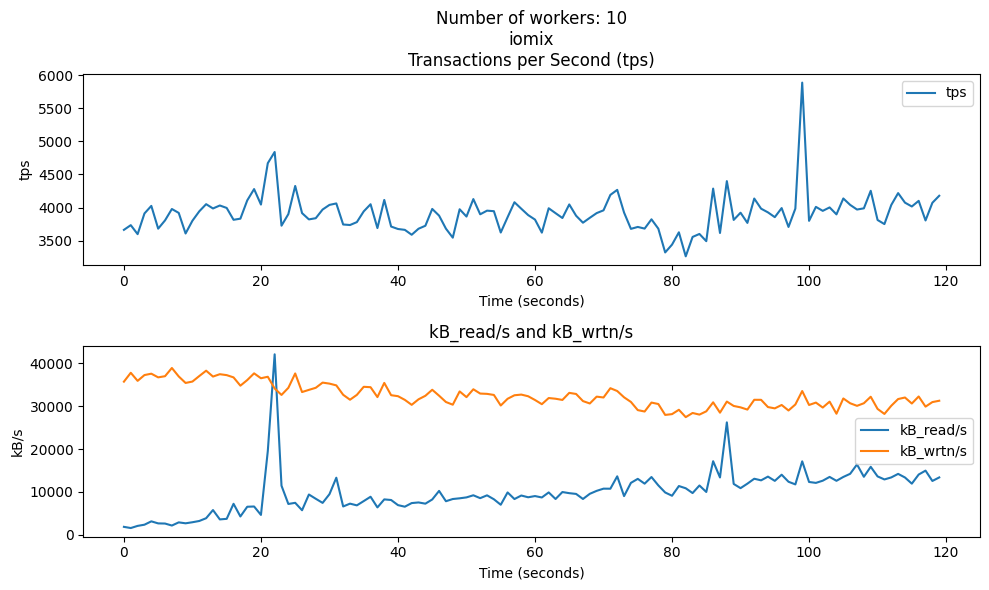

In [203]:
workers_num = 10
method = 'iomix'
process = run_stress_ng(method, workers_num)
time.sleep(10)
tps_values, kb_read_values, kb_wrtn_values = run_iostat(121, 1)
tps_values = tps_values[1:]
kb_read_values = kb_read_values[1:]
kb_wrtn_values = kb_wrtn_values[1:]
plot_graphs(tps_values, kb_read_values, kb_wrtn_values, workers_num, method)
time.sleep(10)